# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [90]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"
online_rt = pd.read_csv(url,encoding="latin1")
online_rt.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

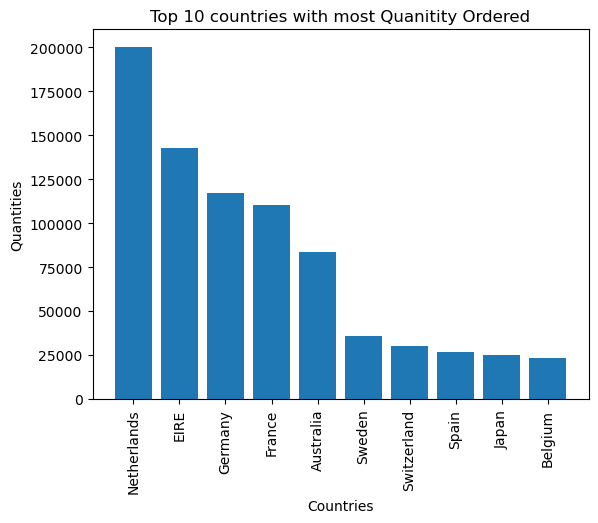

In [91]:
hist1_data = online_rt[online_rt["Country"] != "United Kingdom"][["Country","Quantity"]].groupby("Country",as_index=False).sum().sort_values(by="Quantity",ascending=False).head(10)
hist1_data

fig, axs = plt.subplots()
bar = plt.bar(hist1_data.Country,
              hist1_data.Quantity)
plt.xlabel("Countries")
plt.ylabel("Quantities")
plt.title("Top 10 countries with most Quanitity Ordered")
plt.xticks(rotation=90)

plt.show()

### Step 5.  Exclude negative Quantity entries

In [92]:
online_rt[(online_rt["Country"] != "United Kingdom") & (online_rt["Quantity"] >= 0) ].sort_values(by="Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
392506,570694,C2,CARRIAGE,1,10/12/11 8:10,50.00,14911.0,EIRE
334499,566256,POST,POSTAGE,1,9/11/11 12:27,18.00,12680.0,France
111936,545845,23000,TRAVEL CARD WALLET TRANSPORT,1,3/7/11 13:38,0.42,12754.0,Japan
282774,561658,84012,MAGIC SHEEP WOOL GROWING FROM PAPER,1,7/28/11 16:06,2.55,12743.0,Unspecified
282775,561658,47559B,TEA TIME OVEN GLOVE,1,7/28/11 16:06,1.25,12743.0,Unspecified
...,...,...,...,...,...,...,...,...
63444,541570,21212,PACK OF 72 RETROSPOT CAKE CASES,1440,1/19/11 12:34,0.42,14646.0,Netherlands
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,12/9/10 10:44,2.55,12755.0,Japan
409248,572052,22595,GINGHAM HEART DECORATION,1728,10/20/11 12:26,0.72,14646.0,Netherlands
511421,579498,23084,RABBIT NIGHT LIGHT,2040,11/29/11 15:52,1.79,12798.0,Japan


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

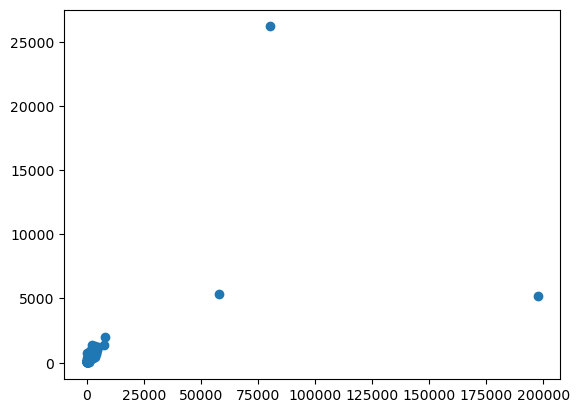

In [93]:
countries = ["Netherlands","EIRE","Germany"]
scatter_data = online_rt[(online_rt["Country"].isin(countries)) & (online_rt["Quantity"] >= 0) ].groupby(["CustomerID","Country"],as_index=False).sum()
scatter_data
fig, axs = plt.subplots()
axs.scatter(scatter_data["Quantity"],scatter_data["UnitPrice"])
plt.show()


### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [94]:
customers = online_rt[["CustomerID","Country","Quantity","UnitPrice"]].groupby(['CustomerID','Country']).sum().head()
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,0,2.08
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [95]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5 entries, (12346.0, 'United Kingdom') to (12350.0, 'Norway')
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   5 non-null      int64  
 1   UnitPrice  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 34.6+ KB


##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [96]:
online_rt[(online_rt["CustomerID"] == 12346.0) | (online_rt["CustomerID"] == 12347.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [97]:
online_rt[online_rt["Country"] != "United Kingdom"].groupby("Country",as_index=False).Quantity.sum().sort_values(by="Quantity",ascending=False).head(3)

,Country,Quantity
24,Netherlands,200128
10,EIRE,142637
14,Germany,117448


##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [98]:
online_rt_outUK = online_rt[online_rt["Country"] != "United Kingdom"]
online_rt_outUK = online_rt[online_rt["Country"].isin(countries)]

In [99]:
online_rt_outUK["Revenue"] = online_rt_outUK["Quantity"] * online_rt_outUK["UnitPrice"]
online_rt_outUK

/var/folders/y1/nqw3rhqs1xv4s4gzlmjk02680000gn/T/ipykernel_3224/868772102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_rt_outUK["Revenue"] = online_rt_outUK["Quantity"] * online_rt_outUK["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands,177.60
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands,15.00
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany,17.70
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany,15.30
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.0,Germany,10.20
...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/11 12:16,1.25,12713.0,Germany,15.00
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/11 12:16,0.85,12713.0,Germany,10.20
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/11 12:16,0.85,12713.0,Germany,10.20
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/11 12:16,2.08,12713.0,Germany,24.96


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [100]:
revenue_mean_per_country_customer = online_rt_outUK.groupby(["Country","CustomerID"],as_index=False)
plotted = revenue_mean_per_country_customer[["Quantity","Revenue"]].sum()
plotted["AvgPrice"] = plotted["Revenue"] / plotted["Quantity"]
plotted

,Country,CustomerID,Quantity,Revenue,AvgPrice
0,EIRE,14016.0,2124,4328.46,2.037881
1,EIRE,14156.0,57025,113384.14,1.988323
2,EIRE,14911.0,77180,132572.62,1.717707
3,Germany,12426.0,258,582.73,2.258643
4,Germany,12427.0,236,708.37,3.001568
...,...,...,...,...,...
102,Netherlands,12789.0,4,91.85,22.962500
103,Netherlands,12790.0,166,324.92,1.957349
104,Netherlands,12791.0,97,192.60,1.985567
105,Netherlands,12802.0,302,412.58,1.366159


##### Step 7.3.3 Plot

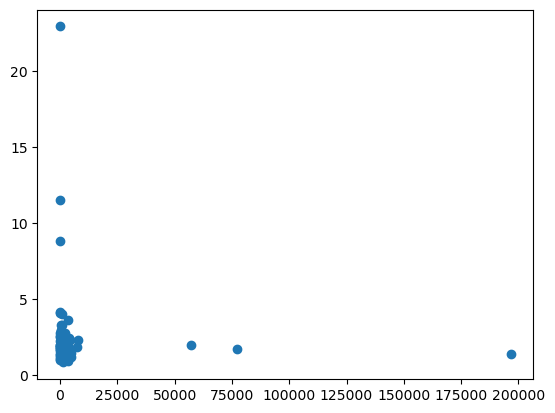

In [101]:
fig, axs = plt.subplots()
axs.scatter(plotted["Quantity"],plotted["AvgPrice"])
plt.show()

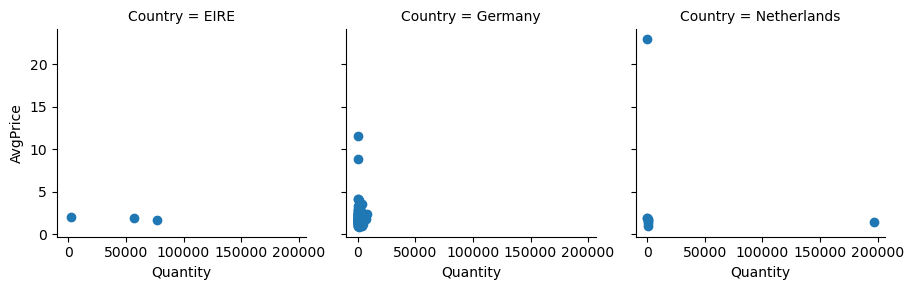

In [102]:
g = sns.FacetGrid(plotted, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

/var/folders/y1/nqw3rhqs1xv4s4gzlmjk02680000gn/T/ipykernel_3224/458484178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_rt_outUK["Revenue"] = online_rt_outUK["Quantity"] * online_rt_outUK["UnitPrice"]


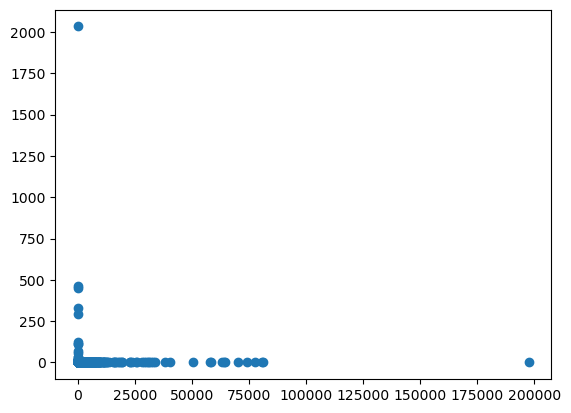

In [115]:
online_rt_outUK = online_rt[online_rt["Quantity"] > 0]#[online_rt["Country"] != "United Kingdom"]

online_rt_outUK["Revenue"] = online_rt_outUK["Quantity"] * online_rt_outUK["UnitPrice"]

grouped_all_countries = online_rt_outUK.groupby(["CustomerID"])
grouped_all_countries = grouped_all_countries[["Quantity","Revenue"]].sum()

grouped_all_countries["AvgPrice"] = grouped_all_countries["Revenue"] / grouped_all_countries["Quantity"]

fig,axs = plt.subplots()

axs.scatter(grouped_all_countries["Quantity"],grouped_all_countries["AvgPrice"])
plt.show()

##### Step 7.4.2 Zoom in so we can see that curve more clearly

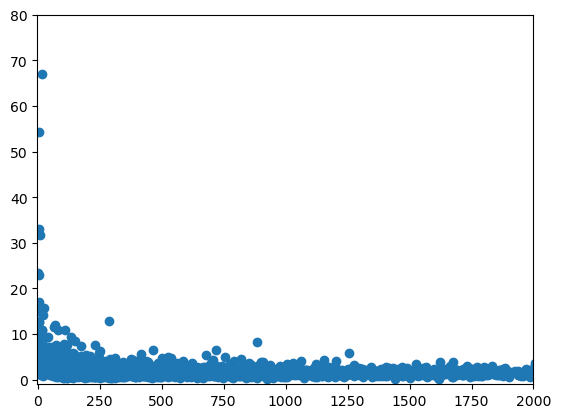

In [117]:
fig,axs = plt.subplots()

axs.scatter(grouped_all_countries["Quantity"],grouped_all_countries["AvgPrice"])

plt.xlim(-1,2000)
plt.ylim(-1,80)
plt.show()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [131]:
online_rt_1 = online_rt[online_rt["Quantity"] > 0]

online_rt_1["Revenue"] = online_rt_1["Quantity"] * online_rt_1["UnitPrice"]

intervals = list(range(0,50,1))
aux_cut = pd.cut(online_rt_1["UnitPrice"],intervals)

grouped = online_rt_1.groupby(aux_cut)
#grouped = grouped[["Quantity","Revenue"]].sum()
grouped = grouped.Revenue.sum()
grouped

/var/folders/y1/nqw3rhqs1xv4s4gzlmjk02680000gn/T/ipykernel_3224/4232562129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_rt_1["Revenue"] = online_rt_1["Quantity"] * online_rt_1["UnitPrice"]
/var/folders/y1/nqw3rhqs1xv4s4gzlmjk02680000gn/T/ipykernel_3224/4232562129.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = online_rt_1.groupby(aux_cut)


UnitPrice
(0, 1]      1107774.544
(1, 2]      2691765.110
(2, 3]      2024143.090
(3, 4]       865101.780
(4, 5]      1219377.050
(5, 6]       391001.440
(6, 7]       268922.630
(7, 8]       306205.230
(8, 9]       380043.780
(9, 10]      163837.730
(10, 11]     238086.810
(11, 12]      25263.810
(12, 13]     201834.290
(13, 14]      10601.790
(14, 15]      74428.790
(15, 16]      21168.790
(16, 17]      83848.440
(17, 18]      36664.180
(18, 19]        728.190
(19, 20]      17771.430
(20, 21]      21066.670
(21, 22]       2990.410
(22, 23]         23.000
(23, 24]         23.530
(24, 25]      42633.490
(25, 26]      12006.290
(26, 27]        134.180
(27, 28]       8904.000
(28, 29]         28.660
(29, 30]       8258.540
(30, 31]          0.000
(31, 32]          0.000
(32, 33]       2942.410
(33, 34]       5186.970
(34, 35]       9399.530
(35, 36]       2870.200
(36, 37]        181.590
(37, 38]         74.960
(38, 39]         38.260
(39, 40]      20749.790
(40, 41]         80.920
(41, 4

#### 8.3 Plot.

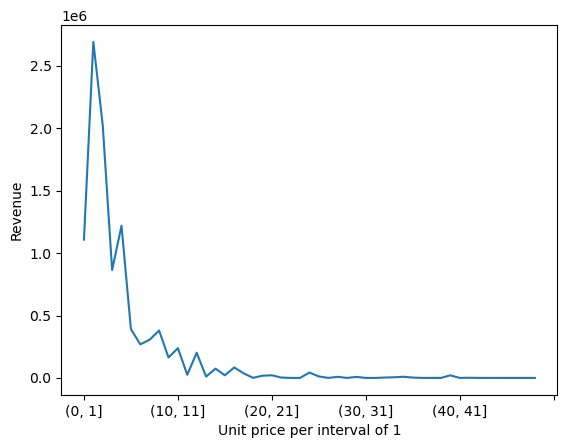

In [132]:
grouped.plot()
plt.xlabel("Unit price per interval of 1")
plt.ylabel("Revenue")
plt.show()


#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

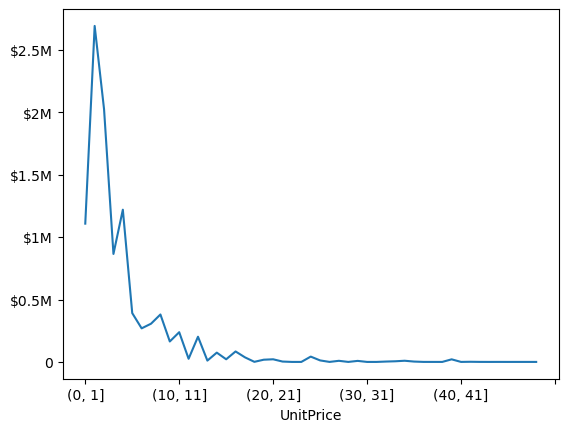

In [147]:

plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
grouped.plot()
plt.show()

### BONUS: Create your own question and answer it.